In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from solver import Solver
from neural_net import NeuralNet

%load_ext autoreload
%autoreload 2

In [2]:
data = {}
train_data = np.array(list(csv.reader(open("mnist_train.csv"), delimiter=','))).astype(np.uint8)
X, y = train_data[:, 1:], train_data[:, 0]
X = X.astype(np.float32) / 255.0
N = X.shape[0]
random_perm = np.random.permutation(N)
N_train = 6400
N_val = N - N_train
data['X_train'] = X[random_perm[:N_train]]
data['y_train'] = y[random_perm[:N_train]]
data['X_val'] = X[random_perm[N_train:]]
data['y_val'] = y[random_perm[N_train:]]
data['X_test'] = np.array(list(csv.reader(open("mnist_test.csv"), delimiter=','))).astype(np.float32) / 255.0
N_test = data['X_test'].shape[0]

for k, v in list(data.items()):
    print(('%s: ' % k, v.shape))

('X_train: ', (6400, 784))
('y_train: ', (6400,))
('X_val: ', (600, 784))
('y_val: ', (600,))
('X_test: ', (3000, 784))


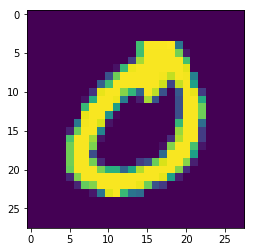

0


In [3]:
plt.imshow(data['X_train'][0].reshape(28, 28))
plt.show()
print(data['y_train'][0])

In [24]:
weight_scale = 5e-2
learning_rate = 0.5
model = NeuralNet([30], weight_scale=weight_scale, 
                   activation='relu', loss_fn='softmax', dtype=np.float32)
solver = Solver(model, data, print_every=100, num_epochs=30, batch_size=25, lr=learning_rate)
solver.train()

(Iteration 1 / 7680) loss: 2.325844
(Epoch 0 / 30) train acc: 0.126250; val_acc: 0.100000
(Iteration 101 / 7680) loss: 0.331840
(Iteration 201 / 7680) loss: 0.160645
(Epoch 1 / 30) train acc: 0.878906; val_acc: 0.870000
(Iteration 301 / 7680) loss: 0.078626
(Iteration 401 / 7680) loss: 0.234282
(Iteration 501 / 7680) loss: 0.206910
(Epoch 2 / 30) train acc: 0.943906; val_acc: 0.931667
(Iteration 601 / 7680) loss: 0.145430
(Iteration 701 / 7680) loss: 0.253356
(Epoch 3 / 30) train acc: 0.938594; val_acc: 0.901667
(Iteration 801 / 7680) loss: 0.062382
(Iteration 901 / 7680) loss: 0.215429
(Iteration 1001 / 7680) loss: 0.142686
(Epoch 4 / 30) train acc: 0.957031; val_acc: 0.915000
(Iteration 1101 / 7680) loss: 0.195314
(Iteration 1201 / 7680) loss: 0.101562
(Epoch 5 / 30) train acc: 0.956875; val_acc: 0.915000
(Iteration 1301 / 7680) loss: 0.028517
(Iteration 1401 / 7680) loss: 0.086925
(Iteration 1501 / 7680) loss: 0.004296
(Epoch 6 / 30) train acc: 0.968437; val_acc: 0.920000
(Iteration

In [4]:
models = []
weight_scale = 1.5e-2
learning_rate = 1e-2
model = NeuralNet([100, 100], weight_scale=weight_scale,
                   activation='relu', loss_fn='softmax', dtype=np.float64)
solver = Solver(model, data, print_every=100, num_epochs=50, batch_size=250, lr=learning_rate)
solver.train()
models.append(model)

(Iteration 1 / 1200) loss: 2.339105
(Epoch 0 / 50) train acc: 0.242500; val_acc: 0.229000
(Epoch 1 / 50) train acc: 0.850667; val_acc: 0.848000
(Epoch 2 / 50) train acc: 0.874167; val_acc: 0.858000
(Epoch 3 / 50) train acc: 0.909833; val_acc: 0.914000
(Epoch 4 / 50) train acc: 0.870000; val_acc: 0.861000
(Iteration 101 / 1200) loss: 0.252601
(Epoch 5 / 50) train acc: 0.934000; val_acc: 0.919000
(Epoch 6 / 50) train acc: 0.939667; val_acc: 0.928000
(Epoch 7 / 50) train acc: 0.951667; val_acc: 0.930000
(Epoch 8 / 50) train acc: 0.959667; val_acc: 0.933000
(Iteration 201 / 1200) loss: 0.106186
(Epoch 9 / 50) train acc: 0.964333; val_acc: 0.939000
(Epoch 10 / 50) train acc: 0.965000; val_acc: 0.934000
(Epoch 11 / 50) train acc: 0.977333; val_acc: 0.939000
(Epoch 12 / 50) train acc: 0.979667; val_acc: 0.935000
(Iteration 301 / 1200) loss: 0.093236
(Epoch 13 / 50) train acc: 0.980500; val_acc: 0.948000
(Epoch 14 / 50) train acc: 0.982667; val_acc: 0.941000
(Epoch 15 / 50) train acc: 0.986167

In [5]:
print(solver.weights_history['W1'][5][8][15])
x = data['X_train'][0]
print(model.find_output(x)[3][6])

0.027507876922064953
4.507133304953911


In [6]:
weight_scale = 2e-2
learning_rate = 1e-2
model = NeuralNet([100, 100, 100], weight_scale=weight_scale, 
                   activation='relu', loss_fn='softmax', dtype=np.float64)
solver = Solver(model, data, print_every=100, num_epochs=50, batch_size=250, lr=learning_rate)
solver.train()
models.append(model)

(Iteration 1 / 1200) loss: 2.289845
(Epoch 0 / 50) train acc: 0.141500; val_acc: 0.123000
(Epoch 1 / 50) train acc: 0.599500; val_acc: 0.593000
(Epoch 2 / 50) train acc: 0.792167; val_acc: 0.795000
(Epoch 3 / 50) train acc: 0.811667; val_acc: 0.802000
(Epoch 4 / 50) train acc: 0.823500; val_acc: 0.812000
(Iteration 101 / 1200) loss: 0.425309
(Epoch 5 / 50) train acc: 0.885500; val_acc: 0.871000
(Epoch 6 / 50) train acc: 0.901500; val_acc: 0.881000
(Epoch 7 / 50) train acc: 0.899667; val_acc: 0.888000
(Epoch 8 / 50) train acc: 0.919500; val_acc: 0.907000
(Iteration 201 / 1200) loss: 0.261933
(Epoch 9 / 50) train acc: 0.922833; val_acc: 0.907000
(Epoch 10 / 50) train acc: 0.931833; val_acc: 0.921000
(Epoch 11 / 50) train acc: 0.930000; val_acc: 0.919000
(Epoch 12 / 50) train acc: 0.940833; val_acc: 0.927000
(Iteration 301 / 1200) loss: 0.210126
(Epoch 13 / 50) train acc: 0.945167; val_acc: 0.919000
(Epoch 14 / 50) train acc: 0.918167; val_acc: 0.895000
(Epoch 15 / 50) train acc: 0.951667

In [7]:
weight_scale = 1e-2
learning_rate = 3e-3
model = NeuralNet([100, 100], weight_scale=weight_scale, 
                   activation='relu', loss_fn='svm', dtype=np.float64)
solver = Solver(model, data, print_every=100, num_epochs=50, batch_size=250, lr=learning_rate)
solver.train()
models.append(model)

(Iteration 1 / 1200) loss: 8.997276
(Epoch 0 / 50) train acc: 0.176167; val_acc: 0.165000
(Epoch 1 / 50) train acc: 0.833500; val_acc: 0.836000
(Epoch 2 / 50) train acc: 0.895333; val_acc: 0.895000
(Epoch 3 / 50) train acc: 0.908500; val_acc: 0.907000
(Epoch 4 / 50) train acc: 0.924833; val_acc: 0.917000
(Iteration 101 / 1200) loss: 0.399709
(Epoch 5 / 50) train acc: 0.931833; val_acc: 0.918000
(Epoch 6 / 50) train acc: 0.935667; val_acc: 0.921000
(Epoch 7 / 50) train acc: 0.941000; val_acc: 0.914000
(Epoch 8 / 50) train acc: 0.950500; val_acc: 0.926000
(Iteration 201 / 1200) loss: 0.207939
(Epoch 9 / 50) train acc: 0.951333; val_acc: 0.929000
(Epoch 10 / 50) train acc: 0.961500; val_acc: 0.938000
(Epoch 11 / 50) train acc: 0.960000; val_acc: 0.935000
(Epoch 12 / 50) train acc: 0.965667; val_acc: 0.935000
(Iteration 301 / 1200) loss: 0.089952
(Epoch 13 / 50) train acc: 0.967667; val_acc: 0.940000
(Epoch 14 / 50) train acc: 0.970000; val_acc: 0.932000
(Epoch 15 / 50) train acc: 0.973667

In [8]:
weight_scale = 2e-2
learning_rate = 1e-2
model = NeuralNet([100, 100, 100], weight_scale=weight_scale, 
                   activation='relu', loss_fn='svm', dtype=np.float64)
solver = Solver(model, data, print_every=100, num_epochs=50, batch_size=250, lr=learning_rate)
solver.train()
models.append(model)

(Iteration 1 / 1200) loss: 8.985060
(Epoch 0 / 50) train acc: 0.168667; val_acc: 0.158000
(Epoch 1 / 50) train acc: 0.802167; val_acc: 0.797000
(Epoch 2 / 50) train acc: 0.876167; val_acc: 0.873000
(Epoch 3 / 50) train acc: 0.900000; val_acc: 0.881000
(Epoch 4 / 50) train acc: 0.905667; val_acc: 0.898000
(Iteration 101 / 1200) loss: 0.365416
(Epoch 5 / 50) train acc: 0.933500; val_acc: 0.923000
(Epoch 6 / 50) train acc: 0.943167; val_acc: 0.923000
(Epoch 7 / 50) train acc: 0.936167; val_acc: 0.911000
(Epoch 8 / 50) train acc: 0.959333; val_acc: 0.940000
(Iteration 201 / 1200) loss: 0.116618
(Epoch 9 / 50) train acc: 0.965833; val_acc: 0.937000
(Epoch 10 / 50) train acc: 0.968333; val_acc: 0.938000
(Epoch 11 / 50) train acc: 0.972500; val_acc: 0.937000
(Epoch 12 / 50) train acc: 0.976833; val_acc: 0.945000
(Iteration 301 / 1200) loss: 0.092184
(Epoch 13 / 50) train acc: 0.979833; val_acc: 0.941000
(Epoch 14 / 50) train acc: 0.973833; val_acc: 0.936000
(Epoch 15 / 50) train acc: 0.982833

In [9]:
weight_scale = 5e-2
learning_rate = 3e-2
model = NeuralNet([100, 100], weight_scale=weight_scale, 
                   activation='sigmoid', loss_fn='svm', dtype=np.float64)
solver = Solver(model, data, print_every=100, num_epochs=100, batch_size=250, lr=learning_rate)
solver.train()
models.append(model)

(Iteration 1 / 2400) loss: 8.969758
(Epoch 0 / 100) train acc: 0.095333; val_acc: 0.080000
(Epoch 1 / 100) train acc: 0.279667; val_acc: 0.293000
(Epoch 2 / 100) train acc: 0.501000; val_acc: 0.479000
(Epoch 3 / 100) train acc: 0.712833; val_acc: 0.716000
(Epoch 4 / 100) train acc: 0.739167; val_acc: 0.742000
(Iteration 101 / 2400) loss: 1.814491
(Epoch 5 / 100) train acc: 0.783333; val_acc: 0.775000
(Epoch 6 / 100) train acc: 0.788333; val_acc: 0.790000


C:\Users\hp\Desktop\Second Year\SEMESTER_2\ELL409\Assignments\src\layers.py:36: RuntimeWarning: overflow encountered in exp
  out = 1./(1 + np.exp(-x))


(Epoch 7 / 100) train acc: 0.834833; val_acc: 0.844000
(Epoch 8 / 100) train acc: 0.844500; val_acc: 0.835000
(Iteration 201 / 2400) loss: 1.052268
(Epoch 9 / 100) train acc: 0.857667; val_acc: 0.843000
(Epoch 10 / 100) train acc: 0.860833; val_acc: 0.832000
(Epoch 11 / 100) train acc: 0.868333; val_acc: 0.859000
(Epoch 12 / 100) train acc: 0.878000; val_acc: 0.862000
(Iteration 301 / 2400) loss: 0.668958
(Epoch 13 / 100) train acc: 0.880667; val_acc: 0.853000
(Epoch 14 / 100) train acc: 0.886333; val_acc: 0.873000
(Epoch 15 / 100) train acc: 0.887333; val_acc: 0.865000
(Epoch 16 / 100) train acc: 0.893167; val_acc: 0.868000
(Iteration 401 / 2400) loss: 0.482743
(Epoch 17 / 100) train acc: 0.894667; val_acc: 0.882000
(Epoch 18 / 100) train acc: 0.897167; val_acc: 0.884000
(Epoch 19 / 100) train acc: 0.904667; val_acc: 0.883000
(Epoch 20 / 100) train acc: 0.899000; val_acc: 0.885000
(Iteration 501 / 2400) loss: 0.612085
(Epoch 21 / 100) train acc: 0.901833; val_acc: 0.889000
(Epoch 22 /

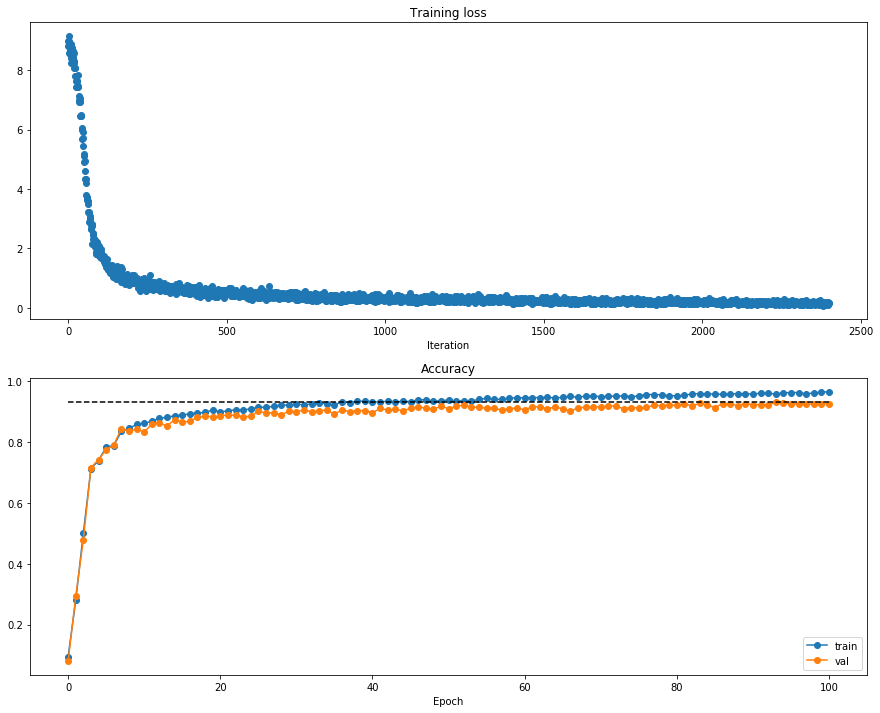

In [10]:
plt.subplot(2, 1, 1)
plt.title('Training loss')
plt.plot(solver.loss_history, 'o')
plt.xlabel('Iteration')

plt.subplot(2, 1, 2)
plt.title('Accuracy')
plt.plot(solver.train_acc_history, '-o', label='train')
plt.plot(solver.val_acc_history, '-o', label='val')
plt.plot([0.93] * len(solver.val_acc_history), 'k--')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.gcf().set_size_inches(15, 12)
plt.show()

In [11]:
y_test = np.zeros((N_test, len(models)))

for i, model in enumerate(models):
    y_test[:, i] = np.argmax(model.loss(data['X_test']), axis=1)
    
y_test = y_test.astype(np.int64)

y_test_pred = np.zeros(N_test)
for i in range(N_test):
    y_test_pred[i] = np.argmax(np.bincount(y_test[i]))

y_test_pred = y_test_pred.astype(np.int64)

In [12]:
submission = np.array([[str(i+1), str(y_test_pred[i])] for i in range(N_test)])
submission = np.append([['id','label']], submission, axis=0)
np.savetxt("submission.csv", submission, fmt='%s', delimiter=',')

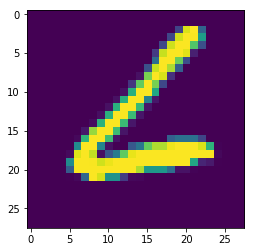

6


In [13]:
plt.imshow(data['X_test'][2].reshape(28, 28))
plt.show()
print(y_test_pred[2])